# Typical Python data tools
When data users think of Python and data manipulation very often their minds go to the library Pandas. Before we introduce Pandas, it is useful to understand a simpler yet also powerful library: NumPy. Also, pandas uses MatplotLib to generate plots, so we will also explore it.

## NumPy arrays
An array is a sequence of elements of the same type. When it is one-dimensional, it is called a *vector* and when it has two dimensions, a *matrix*. You might be thinking "oh, a list", but no, it's not a list. The difference between a list and a NumPy array is that operations in NumPy are applied to each element (with lists, you need to loop through the elements).

To work with NumPy, we need to import it. You will almost always see it imported as `np`:

In [1]:
import numpy as np

Let's say we have three Formula 1 drivers that are 1.80m, 1.71m and 1.68m tall.

In [2]:
height = np.array([1.80, 1.71, 1.68])
height

array([1.8 , 1.71, 1.68])

If they climb on the scenario to speak to the public, and the scenario is 30 cm tall, what is their height with respect to the ground?

In [3]:
height + 0.3

array([2.1 , 2.01, 1.98])

As you can see, the operation of a number with the array is applied to every element. Similarly, operations with arrays are applied element by element. For example, if they climb on a podium, 60, 90 and 30 cm tall:

In [4]:
podium = np.array([0.6, 0.9, 0.3])
height + podium

array([2.4 , 2.61, 1.98])

## MatplotLib
Inspired in MATLAB, a classic of numeric computing, **Matplotlib** is a Python library containing an impressive range of graphical methods, including image processing. As some other libraries in the Python world, Matplotlib has several API's, which makes it a bit confusing for the beginners. In this context, an **application programming interface** (API) is like an idiom that you use for calling the functions of the library. It defines the kinds of requests that can be made and how to make them. 

Matplotlib offers you a choice between two API's, the **pyplot API** and the **object-oriented API**. This course uses the pyplot API. Beware that, if you search for help in the Internet, the solutions found can come in any of the two API's. Due to this mix, Matplotlib may look a bit confusing to the beginner.

The subpackage `matplotlib.pyplot` is a collection of command style functions that make Matplotlib work like MATLAB. It is typically imported as:

In [5]:
import matplotlib.pyplot as plt

Each `pyplot` function makes some change to the figure, such as changing the default size, adding a title, plotting lines, decorating the plot with labels, etc. This is illustrated by the following example, in which we plot together three curves, a linear, a quadratic and a cubic curve.To create a figure with `pyplot`, we need for each curve, a one-dimensional array to be our x-axis values and an equally-sized vector to be our y-axis values. These are *not* formulas we will give `pyplot`, but arrays of values.

In [6]:
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [0, 1, 0, -1, 0, 1, 0, -1, 0, 1]

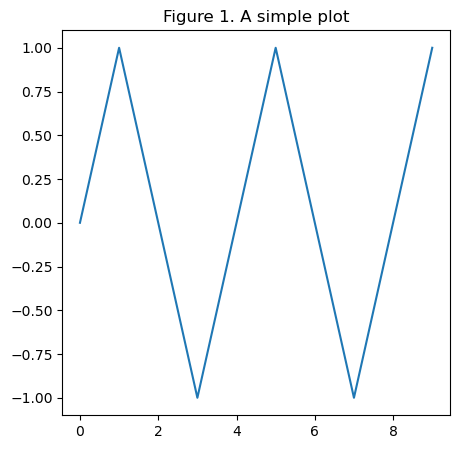

In [7]:
plt.figure(figsize=(5,5))
plt.title('Figure 1. A simple plot')
plt.plot(x, y);

## Pandas
*Pandas* is a library for managing data in tabular format, inspired in the statistical language R. It is not a simple toolkit, but a huge collection of functions and methods, covering practically anything that you may wish to do with data, often in multiple ways. 

Pandas is typically imported as:

In [8]:
import pandas as pd

Pandas provides two data container classes, the series (one-dimensional) and the data frame (two-dimensional). A **series** is like a vector whose terms have names, while a **data frame** is like a table with row and column names. These classes address two shortcomings of NumPy arrays: (a) rows and, specially columns, don't have names, (b) there is a unique data type.

# The body-mass index problem

The **body mass index** (BMI) is defined as the body mass (kg) divided by the square of the body height (m2). The following four lists contain data for calculating the BMI of 15 people, the gender and their ID card.
We want to calculate the following:
1. The BMI of each person.
2. The overall average BMI.
3. The average BMI by gender.
4. The average BMI of those above/below the average height.
5. The average BMI of the last three samples.
6. Number of males and females, above average height.
7. Categorize the BMI values (BMI below 18.5 is "underweight", between 18.5 and 25 is "normal weight", between 25 and 30 is "overweight" and above 30 is "obese")
8. Create a figure that shows, for heights between the maximum and the minimum available in our dataset, where are the thresholds for each category.
9. Display the height of each person, next to their id.
10. Display all the data of the females above average height.

Note: when we say "average height", we are always referring to the average of all the height values, independently of the gender.

In [9]:
height = [1.65, 1.73, 1.51, 1.63, 1.69, 1.7, 1.81, 1.66, 1.58, 1.66, 1.62, 1.81, 1.75, 1.65, 1.65]
weight = [61.6, 59.5, 46.5, 75.3, 47.6, 80.2, 67.5, 64.1, 69.5, 57.0, 68.6, 69.3, 53.2, 66.1, 50.6]
gender = ['M', 'M', 'F', 'F', 'M', 'F', 'M', 'F', 'F', 'M', 'F', 'M', 'F', 'M', 'M']
person_id = ['X32', 'R41', 'A23', 'P95', 'I85', 'Y50', 'E13', 'L66', 'F82', 'D10', 'T29', 'C47', 'Z22', 'N41', 'R11']

Our data is given as lists. We could use a for to loop through the lists and calculate the BMI of each person, but it will be simpler with `NumPy`:

In [10]:
height = np.array(height)
weight = np.array(weight)
gender = np.array(gender)

## Calculation 1: BMI per person

In [11]:
bmi = weight / height**2
bmi

array([22.62626263, 19.88038357, 20.39384238, 28.34130001, 16.66608312,
       27.75086505, 20.60376667, 23.26172159, 27.84008973, 20.68515024,
       26.13930803, 21.15320045, 17.37142857, 24.27915519, 18.58585859])

The numbers are hard to read with some many decimals. Let's round them to 1 decimal, using the NumPy array method:

In [12]:
bmi.round(1)

array([22.6, 19.9, 20.4, 28.3, 16.7, 27.8, 20.6, 23.3, 27.8, 20.7, 26.1,
       21.2, 17.4, 24.3, 18.6])

## Calculation 2: Average BMI

In [13]:
bmi.mean().round(1)

22.4

## Calculation 3: Average BMI per gender

With a loop, we would have an `if` statement for each iteration to check whether the element has to be considered or not. When using `NumPy`, instead we use masks to keep only those values we are interested in. Let's start with females:

In [14]:
bmi[gender == 'F'].mean().round(1)

24.4

The condition between brackets must be met for each element that is kept. This is called a *mask* and very often we define it separately as a variable so we can re-use it.

In [15]:
mask_female = gender == 'F'
mask_male = gender == 'M'
display(mask_female)
display(mask_male)

array([False, False,  True,  True, False,  True, False,  True,  True,
       False,  True, False,  True, False, False])

array([ True,  True, False, False,  True, False,  True, False, False,
        True, False,  True, False,  True,  True])

Both masks are in fact NumPy arrays with boolean values, that take the value `True` for each element that met our criteria.

In [16]:
bmi[mask_female].mean().round(1)

24.4

In [17]:
bmi[mask_male].mean().round(1)

20.6

## Calculation 4: Average BMI per height

Since we want to divide our population in two groups (above and below average height), we will first need that threshold.

In [18]:
height_threshold = height.mean()
height_threshold

1.673333333333333

In [19]:
mask_above = height > height_threshold
mask_below = height < height_threshold

In [20]:
bmi[mask_above].mean().round(1)

20.6

In [21]:
bmi[mask_below].mean().round(1)

23.6

## Calculation 5: Average BMI last 3 samples

We can slide the array in a similar way as we did with strings:

In [22]:
bmi[-3:]

array([17.37142857, 24.27915519, 18.58585859])

In [23]:
bmi[-3:].mean().round(1)

20.1

## Calculation 6: Females and males above average height

We want to calculate how many of our male and female samples are above the overall average height. We will combine the masks we have created to calculate this. We can use "and", "or" and "not" with `&`, `|` and `~` respectively:

In [24]:
mask_female & mask_above

array([False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False])

In [25]:
(mask_female & mask_above).sum()

2

In [26]:
(mask_male & mask_above).sum()

4

## Calculation 7: Categorize BMI

We need a new array to store the categories. So far, we have only seen numerical arrays, but they can also store strings. There are several ways to create the new array. Here, we will make a copy of the BMI numbers, and change the type:

In [27]:
bmi_category = bmi.astype('str')
bmi_category

array(['22.62626262626263', '19.880383574459554', '20.393842375334415',
       '28.341300011291356', '16.666083120338925', '27.75086505190312',
       '20.603766673788957', '23.261721585135724', '27.840089729210057',
       '20.685150239512268', '26.13930803231214', '21.15320045175666',
       '17.371428571428574', '24.279155188246097', '18.58585858585859'],
      dtype='<U32')

See the single quotes? The values are now strings, and we cannot really use them. We still need the number version to create the masks. This trick was useful to quickly create an array of the same size, and of type string. Now, we set the right values:

In [28]:
bmi_category[bmi >= 30.0] = 'obese'
bmi_category[(bmi < 30.0) & (bmi >= 25.0)] = 'overweight'
bmi_category[(bmi < 25.0) & (bmi >= 18.5)] = 'normal weight'
bmi_category[(bmi < 18.5)] = 'underweight'

In [29]:
bmi_category

array(['normal weight', 'normal weight', 'normal weight', 'overweight',
       'underweight', 'overweight', 'normal weight', 'normal weight',
       'overweight', 'normal weight', 'overweight', 'normal weight',
       'underweight', 'normal weight', 'normal weight'], dtype='<U32')

## Calculation 8: Plot categories

In [30]:
min_height = height.min()
max_height = height.max()
x = np.linspace(min_height-0.01, max_height + 0.01, 100)

In [31]:
y_18_5 = (18.5) * x**2
y_25 = (25) * x**2
y_30 = (30) * x**2

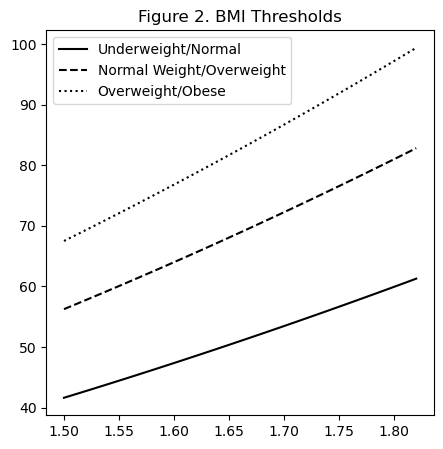

In [32]:
plt.figure(figsize=(5,5))
plt.title('Figure 2. BMI Thresholds')
plt.plot(x, y_18_5, label='Underweight/Normal', color='black')
plt.plot(x, y_25, label='Normal Weight/Overweight', color='black', linestyle='dashed')
plt.plot(x, y_30, label='Overweight/Obese', color='black', linestyle='dotted')
#plt.xtitle('Heigh (m)')
#plt.ytitle('Weight (kg)')
plt.legend();

## Calculation 9: Height and ID

We could loop through the arrays, but an easier way to show the values next to each other is using a Pandas Series.

In [33]:
height_series = pd.Series(height, index=person_id)
height_series

X32    1.65
R41    1.73
A23    1.51
P95    1.63
I85    1.69
Y50    1.70
E13    1.81
L66    1.66
F82    1.58
D10    1.66
T29    1.62
C47    1.81
Z22    1.75
N41    1.65
R11    1.65
dtype: float64

As you can see, the series displayes both the index and the values. If no index is specified, then the row number starting with 0 will be automatically used. We can retrieve the different components:

In [34]:
height_series.index

Index(['X32', 'R41', 'A23', 'P95', 'I85', 'Y50', 'E13', 'L66', 'F82', 'D10',
       'T29', 'C47', 'Z22', 'N41', 'R11'],
      dtype='object')

In [35]:
height_series.values

array([1.65, 1.73, 1.51, 1.63, 1.69, 1.7 , 1.81, 1.66, 1.58, 1.66, 1.62,
       1.81, 1.75, 1.65, 1.65])

## Calculation 10: Data of females above average height

First, we need to create a DataFrame with the information. We could re-use the BMI array, but we will show how to create them using Pandas.

In [36]:
df = pd.DataFrame({'height': height, 'weight': weight, 'gender': gender}, index=person_id)
df

,height,weight,gender
X32,1.65,61.6,M
R41,1.73,59.5,M
A23,1.51,46.5,F
P95,1.63,75.3,F
I85,1.69,47.6,M
Y50,1.70,80.2,F
E13,1.81,67.5,M
L66,1.66,64.1,F
F82,1.58,69.5,F
D10,1.66,57.0,M


To access a column we use square brackets and the column name. If we assign a value to a non-existant column, it will be created.

In [37]:
df['bmi'] = df['weight'] / df['height']**2
df

,height,weight,gender,bmi
X32,1.65,61.6,M,22.626263
R41,1.73,59.5,M,19.880384
A23,1.51,46.5,F,20.393842
P95,1.63,75.3,F,28.341300
I85,1.69,47.6,M,16.666083
Y50,1.70,80.2,F,27.750865
E13,1.81,67.5,M,20.603767
L66,1.66,64.1,F,23.261722
F82,1.58,69.5,F,27.840090
D10,1.66,57.0,M,20.685150


After creating the DataFrame, we can create a mask. The process is very similar to NumPy. We can also use methods to calculate column aggregates, like `.mean()`. Instead of an array of `True` and `False` values, a series with the same index as the DataFrame is created.

In [38]:
mask = (df['gender'] == 'F') & (df['height'] > df['height'].mean())
mask

X32    False
R41    False
A23    False
P95    False
I85    False
Y50     True
E13    False
L66    False
F82    False
D10    False
T29    False
C47    False
Z22     True
N41    False
R11    False
dtype: bool

If what we want is to retrieve the data:

In [39]:
df[mask]

,height,weight,gender,bmi
Y50,1.70,80.2,F,27.750865
Z22,1.75,53.2,F,17.371429
